In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_57957_U')

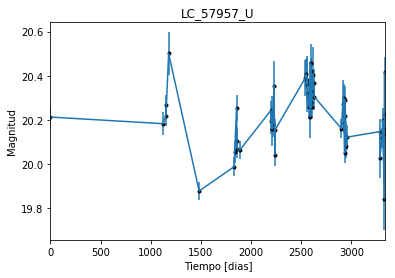

In [2]:
data = np.genfromtxt('LC_57957_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_57957_U')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

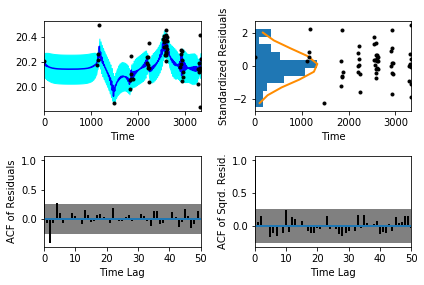

In [5]:
sample.assess_fit()

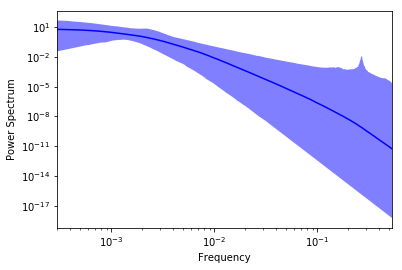

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_57957_U')

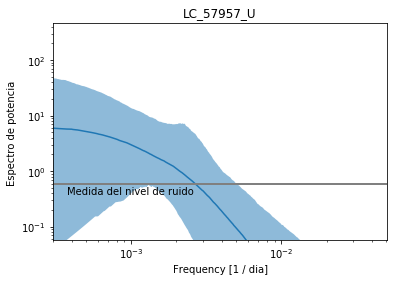

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_57957_U')

Text(0.5,1,'Prediccion , valor esperado LC_57957_U')

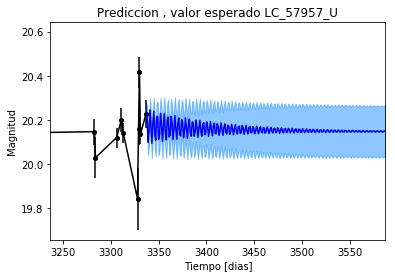

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_57957_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_57957_U')

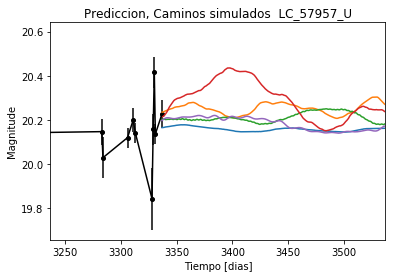

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_57957_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_57957_U')

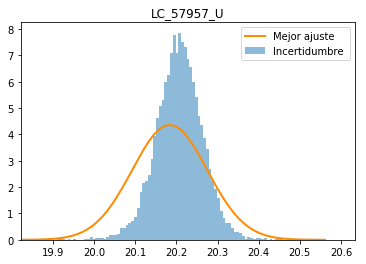

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_57957_U')

Text(0.5,1,'Interpolacion, camino simulado LC_57957_U')

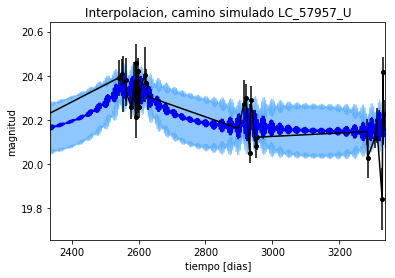

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_57957_U')

Text(0.5,1,'Interpolacion, camino simulado LC_57957_U')

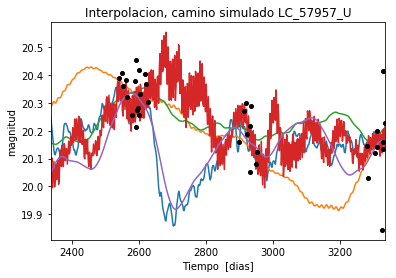

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_57957_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 713.648378847
Median: 0.00684564950058
Standard deviation: 0.180498041041
68% credibility interval: [ 0.00077398  0.13666057]
95% credibility interval: [  3.35418603e-04   7.36555530e-01]
99% credibility interval: [  3.09271229e-04   1.00432106e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 472.272536722
Median: 0.00208220618408
Standard deviation: 0.0863185408041
68% credibility interval: [ 0.00053165  0.02205819]
95% credibility interval: [ 0.00032518  0.24488452]
99% credibility interval: [  3.04336089e-04   6.33751965e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1060.80853555
Median: 0.0231118349233
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 853.490780863
Median: 69.092579013
Standard deviation: 1.66828964888
68% credibility interval: [ 67.31944488  70.24419405]
95% credibility interval: [ 64.9928533   71.57727536]
99% credibility interval: [ 63.25167187  73.26527065]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 420.917598545
Median: 0.703083100766
Standard deviation: 2.25612484893
68% credibility interval: [ 0.05283187  4.04447919]
95% credibility interval: [ 0.0143694   7.24625871]
99% credibility interval: [  9.93161689e-03   1.06631461e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 655.128895798
Median: 0.504931654832
Standard deviation: 9.89989808279
68% credibility interval: [ 0.00925376  7.88182048]
95% credibility interval: [  5.0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 961.891431904
Median: 4.28220305794e-27
Standard deviation: 3.80442249242e+26
68% credibility interval: [  5.58150110e-73   6.84599322e-06]
95% credibility interval: [  6.12211762e-116   4.13811507e+019]
99% credibility interval: [  3.66306138e-148   1.75639816e+023]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3127.15509888
Median: 20.165513043
Standard deviation: 0.068017435278
68% credibility interval: [ 20.11115193  20.22064183]
95% credibility interval: [ 20.0326902   20.30478575]
99% credibility interval: [ 19.95286157  20.39146396]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 228.82139416
Median: 0.00601441179089
Standard deviation: 0.250061809727
68% credibility interval: [ 0.          0.35430569]
95% credibility interval: [ 0.        0.897782]
99% credibility interval: [ 0.          1.02799858]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 228.82139416
Median: 0.00601441179089
Standard deviation: 0.250061809727
68% credibility interval: [ 0.          0.35430569]
95% credibility interval: [ 0.        0.897782]
99% credibility interval: [ 0.          1.02799858]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1405.57984355
Median: 0.0
Standard deviation: 0.000811619868453
68% credibilit

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 853.490780863
Median: 69.092579013
Standard deviation: 1.66828964888
68% credibility interval: [ 67.31944488  70.24419405]
95% credibility interval: [ 64.9928533   71.57727536]
99% credibility interval: [ 63.25167187  73.26527065]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1574.41546483
Median: 0.0200149052398
Standard deviation: 0.0242927729341
68% credibility interval: [ 0.01166339  0.03961987]
95% credibility interval: [ 0.0067994   0.08694189]
99% credibility interval: [ 0.00495733  0.14964397]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1075.63439845
Median: 1.38876840048
Standard deviation: 0.216629961108
68% credibility interval: [ 1.18196711  1.61406756]
95% credibility interval: [ 0.99705691  1.85530214]
99% credibility interval: [ 0.92972985  1.95690891]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 368.678499257
Median: 0.000137575590115
Standard deviation: 0.229583430369
68% credibility interval: [  3.81035007e-07   1.06211479e-02]
95% credibility interval: [  2.61561423e-23   4.14245243e-01]
99% credibility interval: [  1.11654045e-27   1.93072801e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 713.648378847
Median: (-0.0430124843602-0.50293731873j)
Standard deviation: 1.93773324351
68% credibility interval: [-0.85866368-4.47379762j -0.00486308-0.00909228j]
95% credibility interval: [ -4.62791489e+00+0.j          -2.10749724e-03-0.00695475j]
99% credibility interval: [ -6.31033531e+00+0.j          -1.94320844e-03-0.02235939j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 472.272536722
Median: (-0.0130828873023+0.36208306797j)
Standard deviation: 1.66215844382
68% credibility interval: [-0.13859570+6.10053861j -0.00334046+0.88510471j]
95% credibility interval: [-1.53865482+5.63484821j -0.00204316+0.01320302j]
99% credibility interval: [ -3.98198104e+00+0.j  -1.91220004e-03+0.j]
Posterior summary for paramete